In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [2]:
# Load dataset
data = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(data,names = names)

In [3]:
# Explore dataset
print("Explore dataset\n")
#print("\n\nNumber of rows and columns: ", iris.shape)
print(iris.info())
print("\nClass distributuion: \n", iris['class'].value_counts())
print("\nPeek at the dataset:\n",iris.head(5))
print("\nStatistical summary of the dataset:\n",iris.describe())


Explore dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Class distributuion: 
 Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

Peek at the dataset:
    sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Statistical summary of the dataset:
        sepal-length  sepal-width  petal-length 

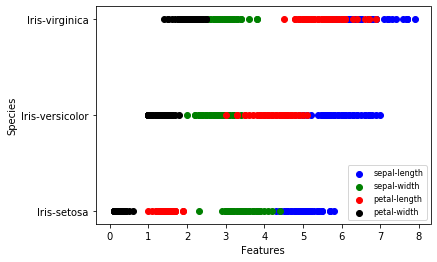

In [4]:
# Data Visualization

# 1.Plot the relation of each feature with each species
plt.xlabel('Features')
plt.ylabel('Species')

pltX = iris.loc[:, 'sepal-length']
pltY = iris.loc[:,'class']
plt.scatter(pltX, pltY, color='blue', label='sepal-length')

pltX = iris.loc[:, 'sepal-width']
pltY = iris.loc[:,'class']
plt.scatter(pltX, pltY, color='green', label='sepal-width')

pltX = iris.loc[:, 'petal-length']
pltY = iris.loc[:,'class']
plt.scatter(pltX, pltY, color='red', label='petal-length')

pltX = iris.loc[:, 'petal-width']
pltY = iris.loc[:,'class']
plt.scatter(pltX, pltY, color='black', label='petal-width')

plt.legend(loc=4, prop={'size':8})
plt.show()


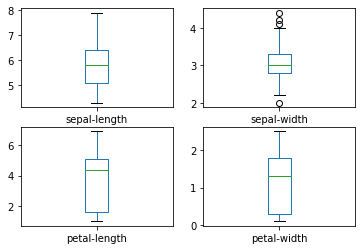

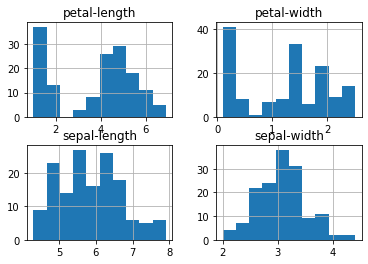

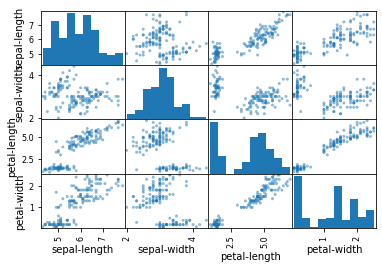

In [5]:

# 2.Box and whisker plots
iris.plot(kind='box', subplots=True, layout=(2,2),sharex=False, sharey=False)
plt.show()

# 3.Histograms
iris.hist()
plt.show()

# 4.Multivariate plots
# Scatter plot
pd.plotting.scatter_matrix(iris)
plt.show()

In [6]:
# 5.Correlation matrix and correlation plot
corr = iris.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1,0.962757
petal-width,0.817954,-0.356544,0.962757,1


In [7]:
# Model Building

# 1.Split-out validation data set
temp_dataset = iris.values
X = temp_dataset[:, 0:4]
Y = temp_dataset[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.2) #splitting in 80-20 train-validate

In [8]:
# Apply classification algorithms for prediction using 80-20 split method

# 1.LogisticRegression
logreg = LogisticRegression()
# Train the model
logreg.fit(X_train,Y_train)
# Test the model : Make predictions on test dataset
Y_prediction = logreg.predict(X_validation)
# Comparing actual values of X_validation with predicted values
compare_values = pd.DataFrame({'Actual': Y_validation.flatten(), 'Predicted': Y_prediction.flatten()})
compare_values

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica
5,Iris-setosa,Iris-setosa
6,Iris-setosa,Iris-setosa
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-versicolor,Iris-versicolor


In [9]:
#Check precision, recall, f1-score
print(classification_report(Y_validation, Y_prediction) )
print(accuracy_score(Y_validation, Y_prediction))


precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

0.9666666666666667
